## 1. 매개변수 갱신

신경망 학습의 목적 : 손실 함수 값을 가능한 낮추는 매개변수 찾기

= 매개변수의 최적 값을 찾는 문제

-> **최적화**

신경망 최적화는 매우 어려운 문제이다.
- 매개변수의 공간이 매우 넓고 복잡해서 최적의 솔루션을 찾기가 어렵다.
- 심층 신경망의 경우에는 매개변수의 개수가 엄청나게 많다.

## 2. 확률적 경사 하강법 (SGD)

매개변수의 기울기를 구해서 기울어진 방향으로 매개변수의 값을 갱신하는 것을 반복한다.

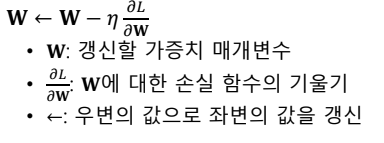

In [7]:
import numpy as np

In [2]:
import sys

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/6')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
class SGD:
  def __init__(self, lr = 0.01): #learning rate(lr)
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key] #파라미터의 모든 key에 대해 음의 방향으로 그래디언트와 학습률을 곱해서 갱신한다

===========iteration:0===========
2.3481833565554147
===========iteration:100===========
1.677574993097537
===========iteration:200===========
0.8569572525020032
===========iteration:300===========
0.750760334384566
===========iteration:400===========
0.5734323324467366
===========iteration:500===========
0.4028281950920599
===========iteration:600===========
0.2549239492310933
===========iteration:700===========
0.4365230661004159
===========iteration:800===========
0.29757619473191155
===========iteration:900===========
0.3803461734113969
===========iteration:1000===========
0.1979538321957625
===========iteration:1100===========
0.2324262973526479
===========iteration:1200===========
0.2438063107802509
===========iteration:1300===========
0.22910966341025993
===========iteration:1400===========
0.21837843284746122
===========iteration:1500===========
0.2424753641018585
===========iteration:1600===========
0.11966754705227547
===========iteration:1700===========
0.16656740253178642
=

<ipython-input-8-ca76d1721d0c>:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


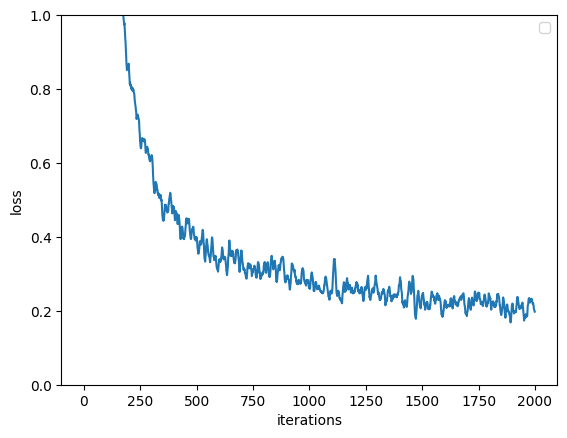

In [8]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizer = SGD()
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                        output_size=10)
train_loss = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    loss = network.loss(x_batch, t_batch)
    train_loss.append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        print(str(loss))


# 3. 그래프 그리기==========
x = np.arange(max_iterations)
plt.plot(x, smooth_curve(train_loss))
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### SGD 클래스를 통한 신경망 매개변수의 진행 수행 (의사 코드)

network = TwoLayerNet(...)

optimizer = SGD()

for i in range(10000):

  ...

  x_batch, t_batch = get_mini_batch(...)

  grads = network.gradient(x_batch, t_batch)

  params = network.params

  optimizer.update(params, grads)

  ...


위에서 optimizer는 최적화를 수행하는 객체로 SGD가 optimizer로 선택됨. 다른 최적화 방법, 예를들어, Momentum() 등으로 다음과 같이 바꿀 수 있음

optimizer = Momentum()

## 3. SGD의 단점

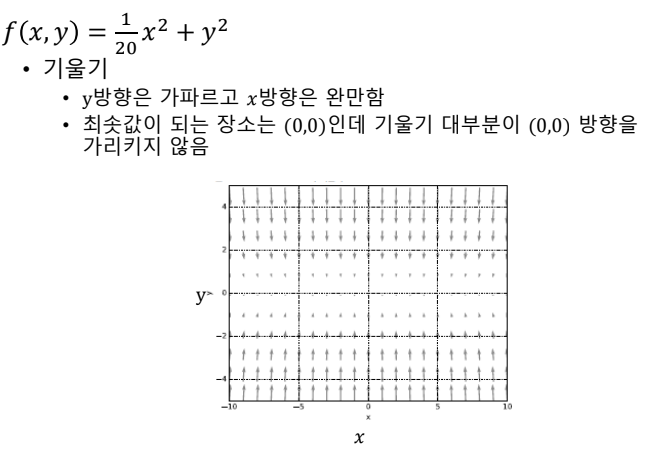

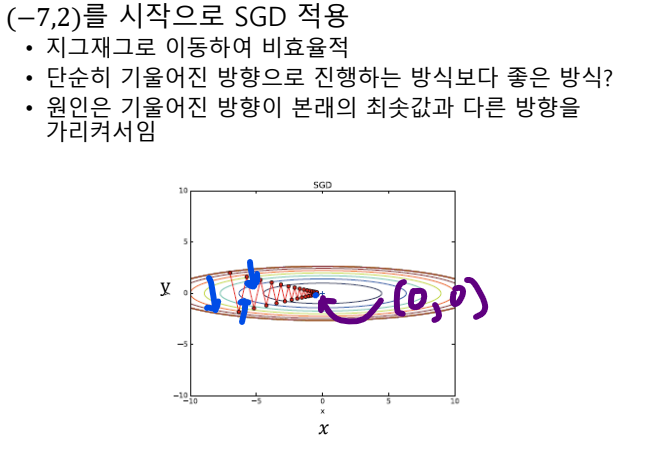

## 4. 모멘텀

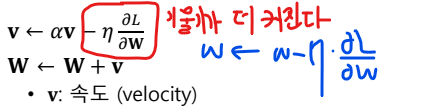

기울기 방향으로 힘을 받아 물체가 가속되는 물리 법칙을 나타낸다.

alpha는 0.9 등의 값으로 설정한다.

이전 반복의 속도에 따라 각 매개변수를 업데이트한다.

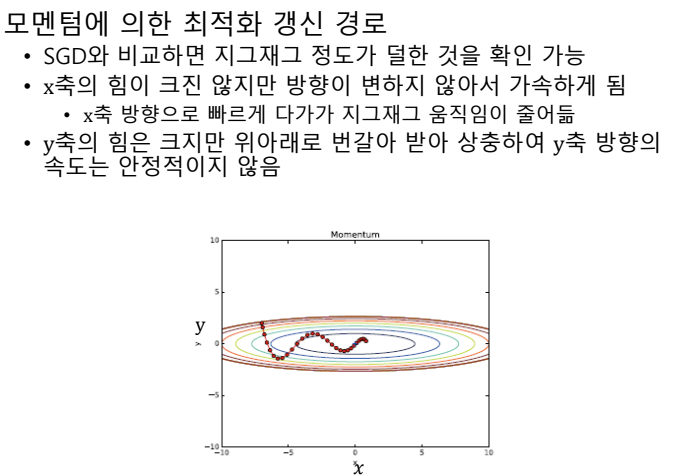![image.png]()

In [ ]:
import sys

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/6')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [11]:
class Momentum:
  def __init__(self, lr = 0.01, momentum = 0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]

===========iteration:0===========
2.3976821036382123
===========iteration:100===========
0.40326098465293864
===========iteration:200===========
0.2615729588962118
===========iteration:300===========
0.24677723481439096
===========iteration:400===========
0.21720494892921943
===========iteration:500===========
0.10183681587555236
===========iteration:600===========
0.11848816870033962
===========iteration:700===========
0.13736064123137895
===========iteration:800===========
0.12467201718968685
===========iteration:900===========
0.11780703703464843
===========iteration:1000===========
0.08893951914596984
===========iteration:1100===========
0.08240584398143197
===========iteration:1200===========
0.050144165924452797
===========iteration:1300===========
0.05869757587322525
===========iteration:1400===========
0.1306951138711942
===========iteration:1500===========
0.13379133441422986
===========iteration:1600===========
0.05331120509719518
===========iteration:1700===========
0.084512

<ipython-input-12-ec3b9b4b0c5f>:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


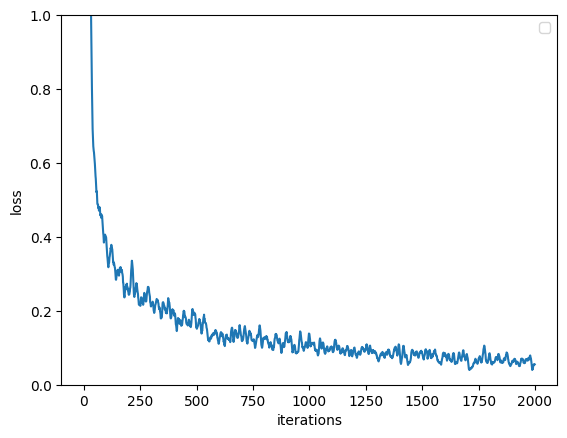

In [12]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizer = Momentum()
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                        output_size=10)
train_loss = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    loss = network.loss(x_batch, t_batch)
    train_loss.append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        print(str(loss))


# 3. 그래프 그리기==========
x = np.arange(max_iterations)
plt.plot(x, smooth_curve(train_loss))
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 4. AdaGrad

학습률을 정하는 효과적인 기술. 학습률 감소

학습을 진행하면서 학습률을 점차적으로 줄이는 방법이다.

처음에는 크게 학습하다가 조금식 작게 학습한다.

- 신경망 학습에서 학습률이 너무 작으면 학습 시간이 길어지고, 너무 크면 발산해서 학습이 제대로 이루어지지 않음.

학습률을 서서히 낮추는 가장 간단한 방법

: 매개변수 전체의 학습률 값을 일괄적으로 낮춘다.

- AdaGrad의 경우 각 매개변수에 맞춤형 학습률 값을 만들어준다.

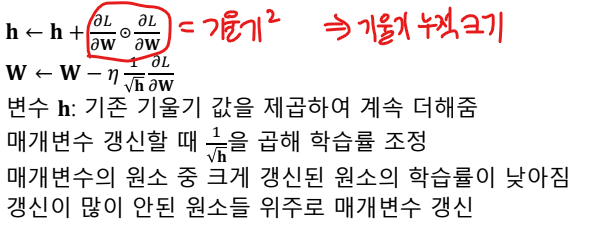

갱신이 많이 안된 매개변수들을 갱신시키는 것.

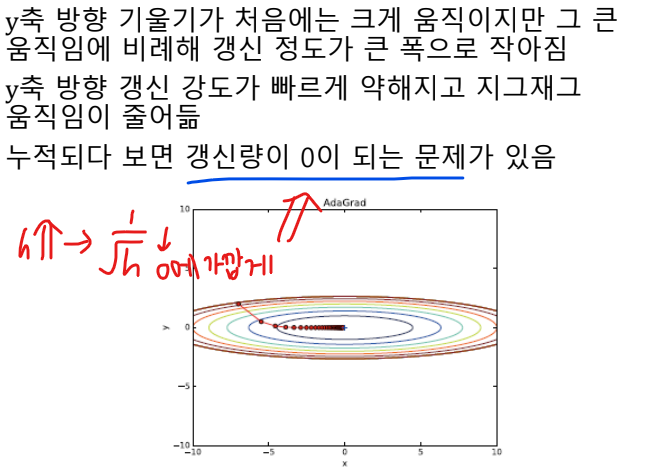

In [ ]:
import sys

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/6')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [13]:
class AdaGrad:
  def __init__(self, lr = 0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) #1e-7을 더하는 이유는 0으로 나누는 것을 방지하기 위함

===========iteration:0===========
2.0696524656558655
===========iteration:100===========
0.21827498619037217
===========iteration:200===========
0.06442806229931622
===========iteration:300===========
0.05976904709279393
===========iteration:400===========
0.0782501062981654
===========iteration:500===========
0.06391747203677754
===========iteration:600===========
0.06991625012642327
===========iteration:700===========
0.037461530108468456
===========iteration:800===========
0.05003296288507937
===========iteration:900===========
0.059798083722072445
===========iteration:1000===========
0.03683074446741188
===========iteration:1100===========
0.050289841753451574
===========iteration:1200===========
0.09904544222214343
===========iteration:1300===========
0.019730459181133666
===========iteration:1400===========
0.021518363435264188
===========iteration:1500===========
0.01168957459060479
===========iteration:1600===========
0.029194463254824846
===========iteration:1700===========
0.

<ipython-input-14-2bebe1b451d5>:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


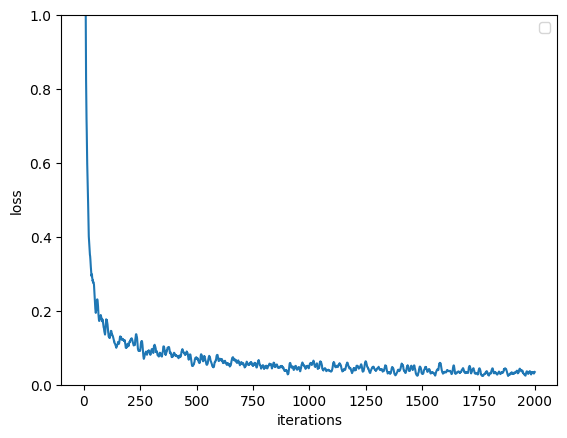

In [14]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizer = AdaGrad()
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                        output_size=10)
train_loss = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    loss = network.loss(x_batch, t_batch)
    train_loss.append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        print(str(loss))


# 3. 그래프 그리기==========
x = np.arange(max_iterations)
plt.plot(x, smooth_curve(train_loss))
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

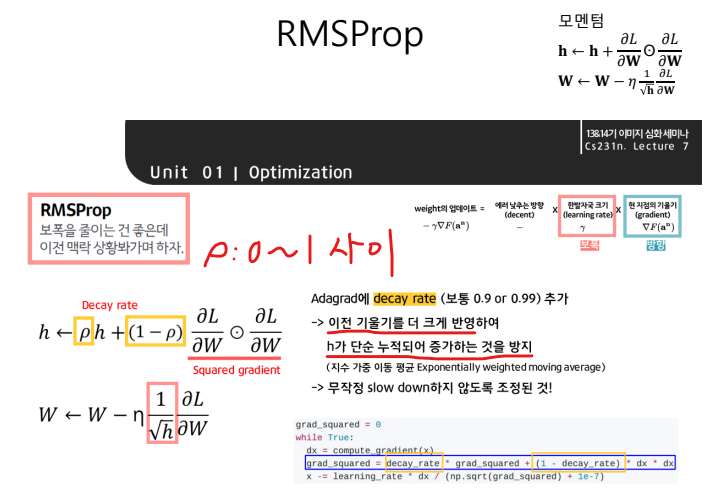

In [17]:
import sys

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/6')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
class RMSprop:
  def __init__(self, lr= 0.01, decay_rate = 0.99):
    self.lr = lr
    self.decay_rate = decay_rate
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)


    for key in params.keys():
      self.h[key] *= self.decay_rate
      self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

===========iteration:0===========
14.229256305142885
===========iteration:100===========
0.6053465758527757
===========iteration:200===========
0.21246761167929487
===========iteration:300===========
0.19210371679947597
===========iteration:400===========
0.10523114830341158
===========iteration:500===========
0.06856091921102297
===========iteration:600===========
0.14183681880429524
===========iteration:700===========
0.21643572797489719
===========iteration:800===========
0.1406303686361641
===========iteration:900===========
0.11721105918442531
===========iteration:1000===========
0.12101960211460867
===========iteration:1100===========
0.1715508807034486
===========iteration:1200===========
0.13033276015354597
===========iteration:1300===========
0.08671171259212443
===========iteration:1400===========
0.047837534407988075
===========iteration:1500===========
0.30022036435935817
===========iteration:1600===========
0.05360050203404916
===========iteration:1700===========
0.0529542

<ipython-input-19-e6627097d5dc>:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


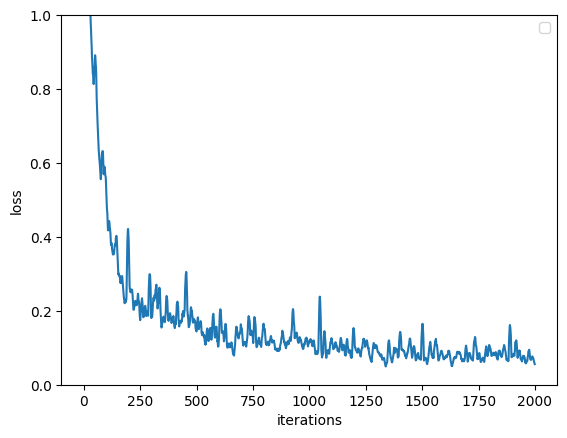

In [19]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizer = RMSprop()
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                        output_size=10)
train_loss = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    loss = network.loss(x_batch, t_batch)
    train_loss.append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        print(str(loss))


# 3. 그래프 그리기==========
x = np.arange(max_iterations)
plt.plot(x, smooth_curve(train_loss))
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 5. Adam

모멘텀 대비 좌우 흔들림이 적다.

학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택이다.

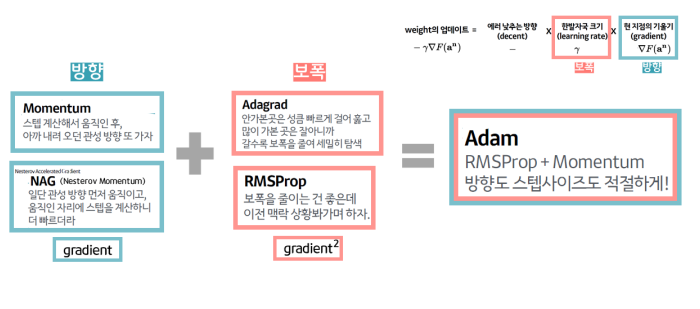

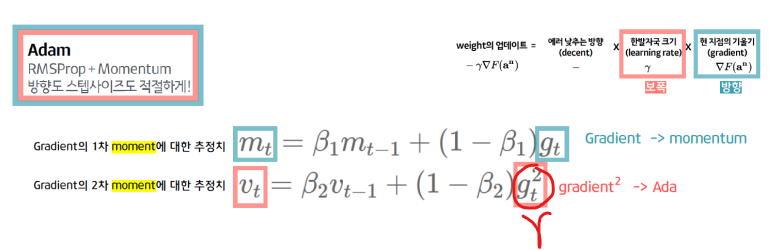

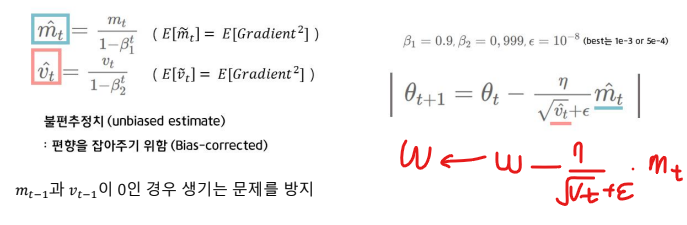

In [32]:
class Adam:
  def __init__(self, lr = 0.001, beta1 = 0.9, beta2 = 0.999):
    self.lr = lr
    self.beta1 = beta1
    self.beta2 = beta2
    self.iter = 0
    self.m = None
    self.v = None

  def update(self, params, grads):
    if self.m is None:
      self.m, self.v = {}, {}
      for key, val in params.items():
        self.m[key] = np.zeros_like(val)
        self.v[key] = np.zeros_like(val)

    self.iter += 1
    lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

    for key in params.keys():
      self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
      self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

      params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

===========iteration:0===========
2.2128440709164687
===========iteration:100===========
0.30494079659965967
===========iteration:200===========
0.24286937472538833
===========iteration:300===========
0.1370110866723877
===========iteration:400===========
0.16003052606433224
===========iteration:500===========
0.16996359197620325
===========iteration:600===========
0.10372109690038114
===========iteration:700===========
0.12205552978659157
===========iteration:800===========
0.06597301931016297
===========iteration:900===========
0.057175227342555895
===========iteration:1000===========
0.03744731411338384
===========iteration:1100===========
0.07780881398971556
===========iteration:1200===========
0.167020483915216
===========iteration:1300===========
0.06211723283108804
===========iteration:1400===========
0.0626180387393936
===========iteration:1500===========
0.023941754607243054
===========iteration:1600===========
0.06517717447549942
===========iteration:1700===========
0.0782318

<ipython-input-30-c1b82671a9e8>:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


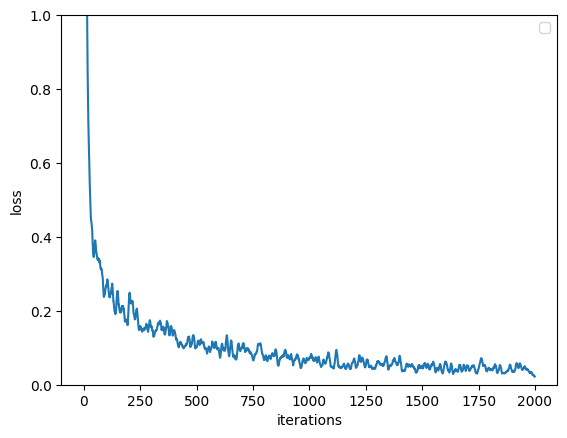

In [30]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizer = Adam()
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                        output_size=10)
train_loss = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    loss = network.loss(x_batch, t_batch)
    train_loss.append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        print(str(loss))


# 3. 그래프 그리기==========
x = np.arange(max_iterations)
plt.plot(x, smooth_curve(train_loss))
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

===========iteration:0===========
SGD:2.297717642788078
Momentum:2.462607070465612
AdaGrad:2.346503549634566
Adam:2.2150438699096595
===========iteration:100===========
SGD:1.4762161220820402
Momentum:0.2583204107272365
AdaGrad:0.11741810020646583
Adam:0.20887497085940543
===========iteration:200===========
SGD:0.7940012714834956
Momentum:0.24518778280425801
AdaGrad:0.11971980450666792
Adam:0.23080057523296418
===========iteration:300===========
SGD:0.5260751065059761
Momentum:0.2123829369377276
AdaGrad:0.08127138703437495
Adam:0.12858930521578688
===========iteration:400===========
SGD:0.35859925462803244
Momentum:0.1677593594067988
AdaGrad:0.08185786527031116
Adam:0.16620401615779176
===========iteration:500===========
SGD:0.2639549618233845
Momentum:0.1073763197352341
AdaGrad:0.025961938545962238
Adam:0.04695553180422643
===========iteration:600===========
SGD:0.32708229936213207
Momentum:0.1784912642954533
AdaGrad:0.08263918236584669
Adam:0.1711168105236826
===========iteration:700

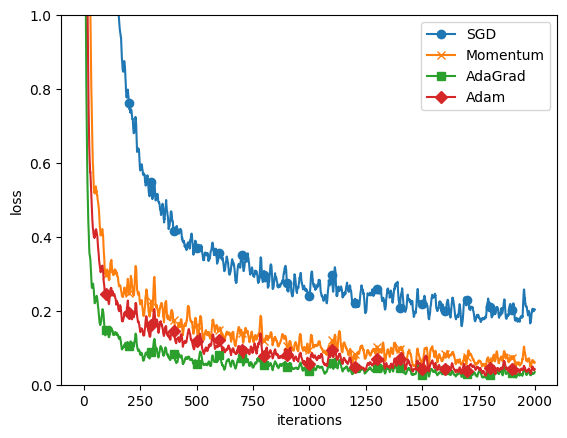

In [31]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
# 각 optimzer 추가
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 6. 가중치 초기값

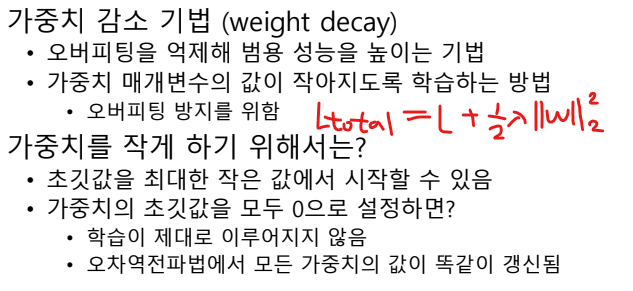


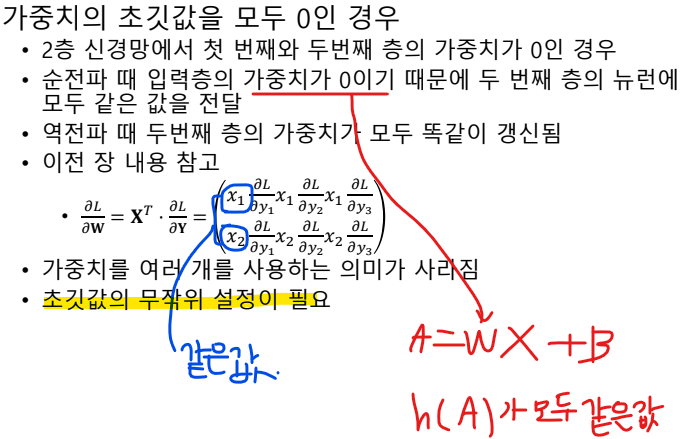![image.png]()

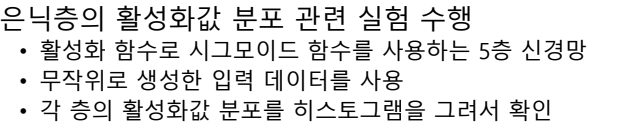

### 1) 시그모이드

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

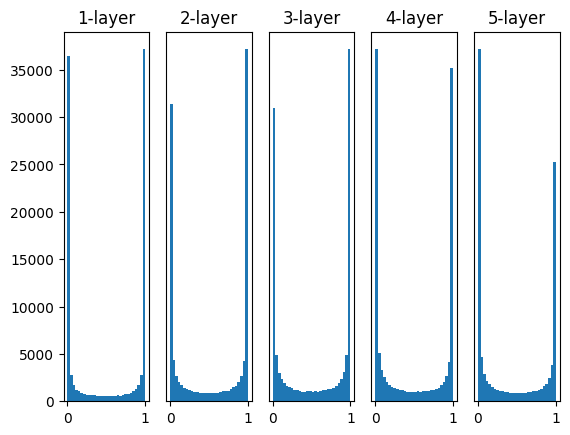

In [41]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

# 작성할 것
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 1
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

시그모이드 함수가 0과 1에 가까워질수록 기울기가 0에 가까워진다. -> 기울기 소실 현상. 갱신이 발생하지 않는다.

왼쪽 끝과 오른쪽 끝에 있는 데이터의 갱신이 잘 이루어지지 않을 것.

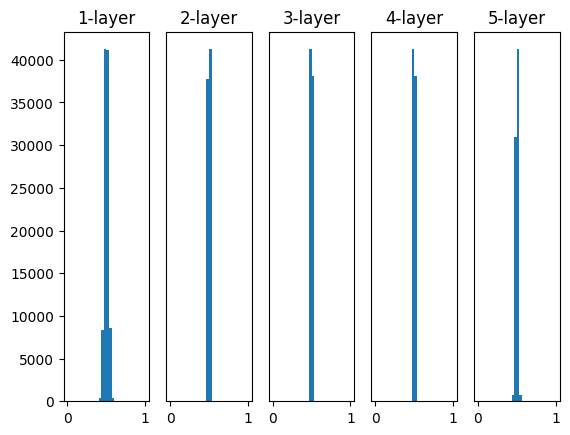

In [40]:
#가중치를 0.01로 바꿈

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

# 작성할 것
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 0.01
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

0.5 부근에 값이 집중되는 모습

0과 1에 치우치지 않아서 기울기 소실 문제는 없지만 활성화값들이 0.5로 치우친 것은 표현력 관점에서 문제가 될 수 있다.

다수의 뉴련이 거의 같은 값을 출력하고 있어서 뉴런을 여러개 사용하는 의미가 없다.

#### Xavier 초기값 사용

일반적인 딥러닝 프레임워크에서 표준적으로 사용한다.

앞 계층의 노드가 n개라면 표준 편차를 1/sqrt(n)인 분포를 사용한다

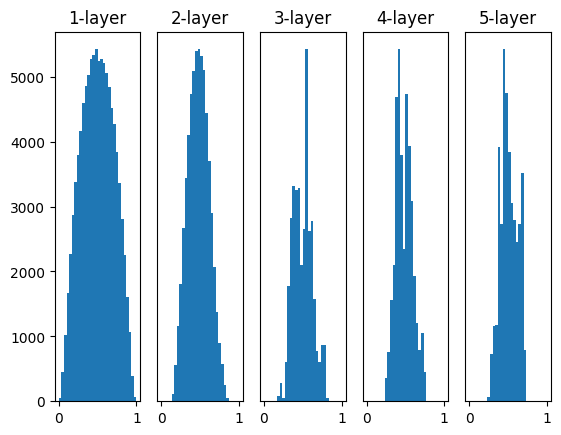

In [42]:
#Xavier 초기값 사용

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

# 작성할 것
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

초기화 과정에서의 기울기 소실 문제를 해결했다

각 층의 데이터가 적당히 퍼져있다

시그모이드 함수의 표현력에 제한을 받지 않는다

### 2) ReLU

ReLU 사용 시 He 초기값을 사용한다

앞 계층의 노드가 n개라면 표준편차가 sqrt(2/n)인 정규분포를 사용한다.

ReLU의 경우 음의 영역이 0이기 때문에 Xavier 초기값 대비 2배의 계수가 필요하다고 해석이 가능하다.

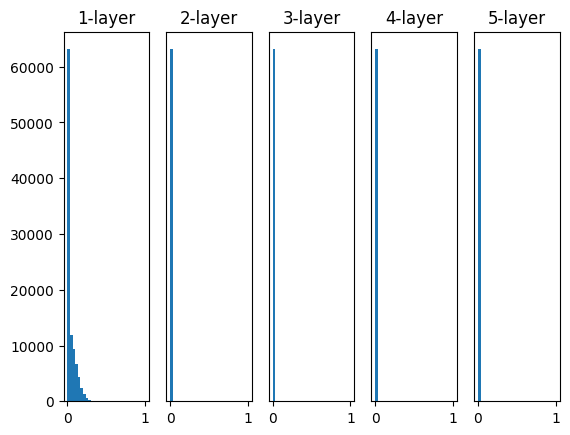

In [43]:
#가중치를 0.01로 바꿈

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

# 작성할 것
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 0.01
  a = np.dot(x, w)
  z = ReLU(a)
  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

값이 골고루 분포되지 않았다

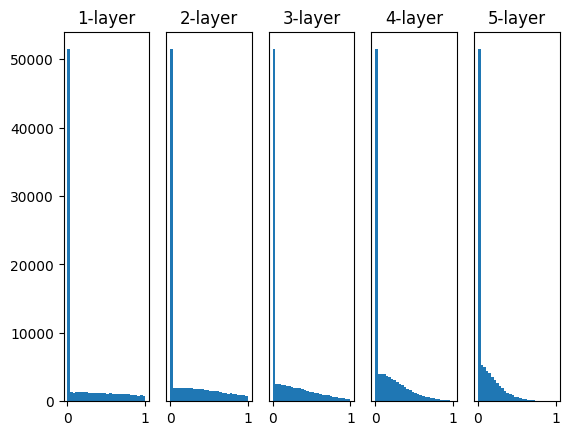

In [47]:
#Xavier 초기값 사용

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

# 작성할 것
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
  a = np.dot(x, w)
  z = ReLU(a)
  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

층이 깊어지면서 치우침이 조금씩 커진다. 층이 깊어짐에 따라 활성화 값들의 치우침이 커지니까 학습 시 기울기 소실 문제를 일으킬 것이다

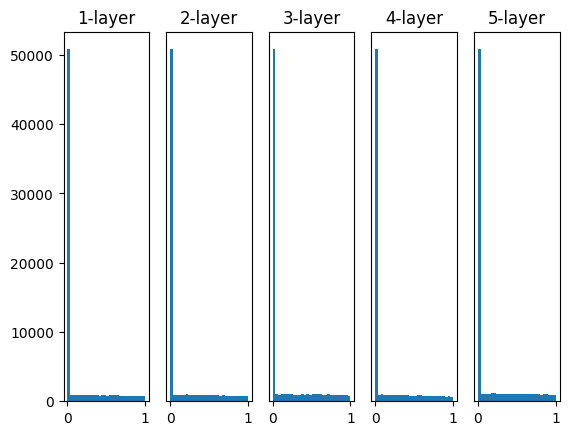

In [48]:
#He 초기값 사용

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

# 작성할 것
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
  a = np.dot(x, w)
  z = ReLU(a)
  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

모든 층에서 균일하게 분포한다. 층의 깊이가 깊어져도 분포가 균일하게 유지되기 때문에 역전파 때도 적절한 값이 나올 것으로 보인다

In [49]:
# coding: utf-8
import os
import sys

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/6')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


===========iteration:0===========
std=0.01:2.3025414030536915
Xavier:2.311211695788983
He:2.307193478953189
===========iteration:100===========
std=0.01:2.302373290223815
Xavier:2.2373836302176477
He:1.6965492746321775
===========iteration:200===========
std=0.01:2.3023400879303155
Xavier:2.0800232413177193
He:0.8958665966734354
===========iteration:300===========
std=0.01:2.3008017219594334
Xavier:1.6282668424203592
He:0.5203239055583753
===========iteration:400===========
std=0.01:2.299732406514263
Xavier:1.1251572797873959
He:0.44972303285436577
===========iteration:500===========
std=0.01:2.3031769944140805
Xavier:0.7430843355381411
He:0.31271767296092046
===========iteration:600===========
std=0.01:2.3008143287169514
Xavier:0.6412073615643148
He:0.30452956979474344
===========iteration:700===========
std=0.01:2.296536206421739
Xavier:0.5838504230299306
He:0.34217414937599416
===========iteration:800===========
std=0.01:2.3030760808002966
Xavier:0.5452800490012021
He:0.398632316849

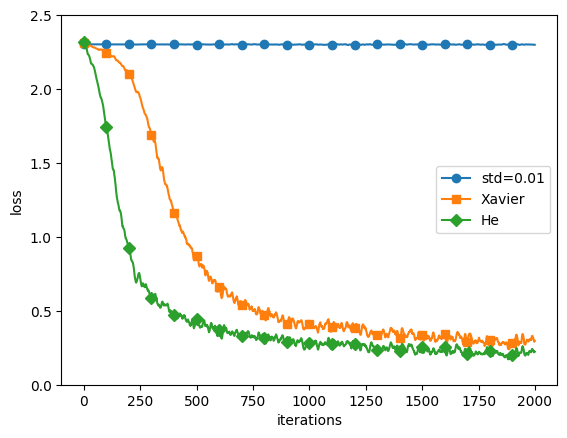

In [50]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

활성화 함수로 ReLU를 사용하며, 층별 뉴런 수가 100개인 5층 신경망이다.

std=0.01일 때 학습이 전혀 이루어지지 않는다

Xavier와 He 초깃값의 경우 학습이 순조롭게 진행되나 학습 진도는 He 초깃값이 더 빠르다

## 7. 배치 정규화

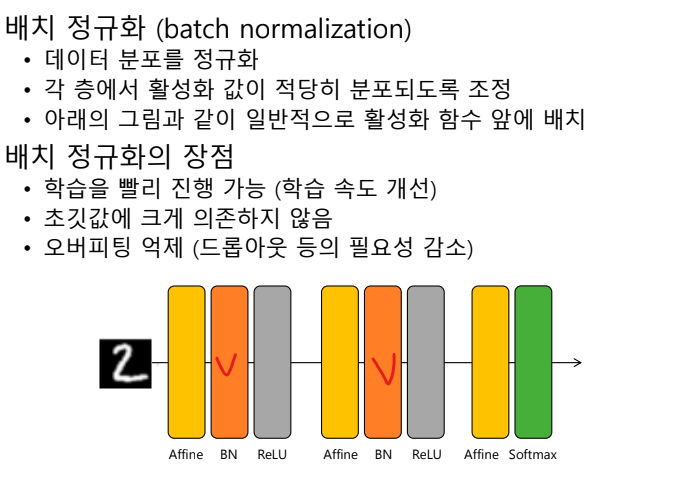

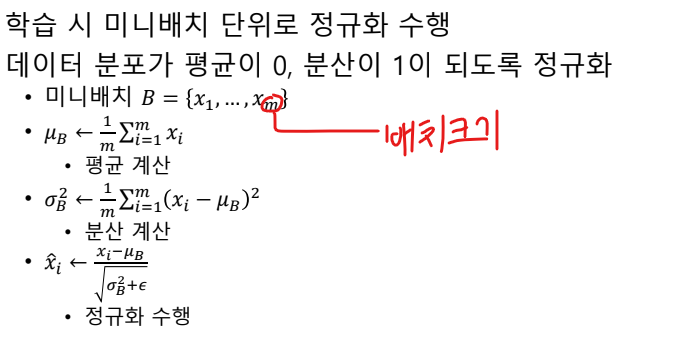

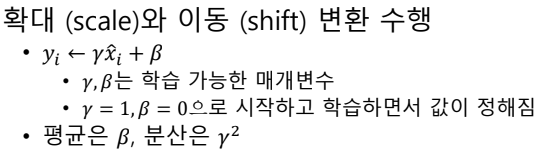

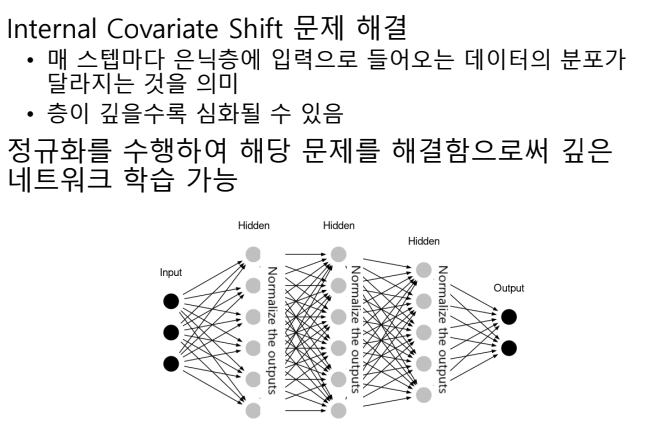

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
============== 1/16 ==============
epoch:0 | 0.099 - 0.109
epoch:1 | 0.097 - 0.114
epoch:2 | 0.097 - 0.148
epoch:3 | 0.097 - 0.173
epoch:4 | 0.097 - 0.193
epoch:5 | 0.097 - 0.202
epoch:6 | 0.097 - 0.218
epoch:7 | 0.097 - 0.237
epoch:8 | 0.097 - 0.268
epoch:9 | 0.097 - 0.279
epoch:10 | 0.097 - 0.294
epoch:11 | 0.097 - 0.32
epoch:12 | 0.097 - 0.34
epoch:13 | 0.097 - 0.347
epoch:14 | 0.097 - 0.355
epoch:15 | 0.097 - 0.375
epoch:16 | 0.097 - 0.387
epoch:17 | 0.097 - 0.406
epoch:18 | 0.097 - 0.407
epoch:19 | 0.097 - 0.426
============== 2/16 ==============
epoch:0 | 0.105 - 0.102


<ipython-input-51-5cad6949ce2f>:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')
/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/6/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.113
epoch:2 | 0.097 - 0.146
epoch:3 | 0.097 - 0.157
epoch:4 | 0.097 - 0.168
epoch:5 | 0.097 - 0.195
epoch:6 | 0.097 - 0.221
epoch:7 | 0.097 - 0.247
epoch:8 | 0.097 - 0.276
epoch:9 | 0.097 - 0.301
epoch:10 | 0.097 - 0.333
epoch:11 | 0.097 - 0.348
epoch:12 | 0.097 - 0.381
epoch:13 | 0.097 - 0.392
epoch:14 | 0.097 - 0.403
epoch:15 | 0.097 - 0.429
epoch:16 | 0.097 - 0.446
epoch:17 | 0.097 - 0.466
epoch:18 | 0.097 - 0.477
epoch:19 | 0.097 - 0.491
============== 3/16 ==============
epoch:0 | 0.097 - 0.086
epoch:1 | 0.296 - 0.093
epoch:2 | 0.441 - 0.12
epoch:3 | 0.543 - 0.145
epoch:4 | 0.607 - 0.185
epoch:5 | 0.666 - 0.219
epoch:6 | 0.73 - 0.258
epoch:7 | 0.76 - 0.292
epoch:8 | 0.799 - 0.32
epoch:9 | 0.821 - 0.358
epoch:10 | 0.834 - 0.383
epoch:11 | 0.864 - 0.422
epoch:12 | 0.865 - 0.447
epoch:13 | 0.883 - 0.47
epoch:14 | 0.91 - 0.497
epoch:15 | 0.922 - 0.526
epoch:16 | 0.926 - 0.536
epoch:17 | 0.93 - 0.565
epoch:18 | 0.94 - 0.584
epoch:19 | 0.945 - 0.602
============== 4/

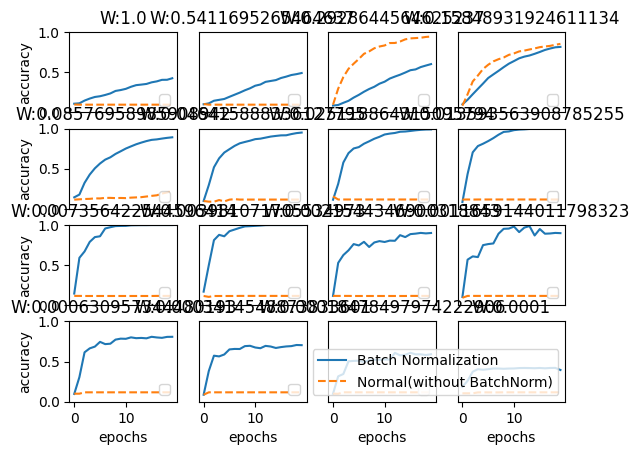

In [51]:
# 코드 수정 필요 없음
import sys, os

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/6')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

w가 10의 0승 ~ 10의 4승 사이의 값이다 (w 값을 바꿔가며 실행)

파란색 - 배치 놈 활용

노란 실선 - 배치 놈 활용 X

배치 놈(배치 정규화)을 적용하면 초기값의 영향을 비교적 덜 받는다. = 초기값에 덜 의존적이다

## 8. **오버피팅 (과잉적합)**

매개변수가 많고 표현력이 높은 모델의 경우, 훈련 데이터가 적은 경우에 발생한다.

가중치 매개변수의 값이 커서 발생하는 경우가 많다.

학습 과정에서 큰 가중치에 대해 패널티를 부여한다.

가중치의 제곱 놈(L2 놈)을 손실 함수에 더한다.

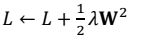

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
epoch:0, train acc:0.10333333333333333, test acc:0.1053
epoch:1, train acc:0.11666666666666667, test acc:0.1134
epoch:2, train acc:0.13666666666666666, test acc:0.1242
epoch:3, train acc:0.16666666666666666, test acc:0.1413
epoch:4, train acc:0.18333333333333332, test acc:0.1499
epoch:5, train acc:0.19666666666666666, test acc:0.1667
epoch:6, train acc:0.24, test acc:0.1805
epoch:7, train acc:0.25333333333333335, test acc:0.1988
epoch:8, train acc:0.2966666666666667, test acc:0.222
epoch:9, train acc:0.32, test acc:0.2344
epoch:10, train acc:0.34, test acc:0.2485
epoch:11, train acc:0.38, test acc:0.2698
epoch:12, train acc:0.41, test acc:0.2822
epoch:13, train acc:0.46, test acc:0.3083
epoch:14, train acc:0.49333333333333335, test acc:0.3287
epoch:15, train acc:0.52, test acc:0.3409
epoch:16, train acc:0.53, test acc:0.362
epoch:17, train acc:0.54, test acc:

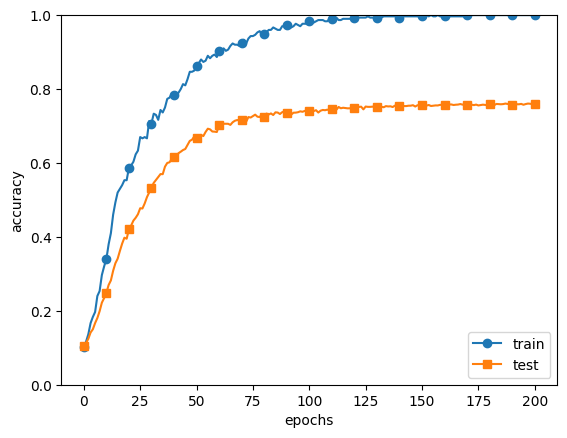

In [53]:
# coding: utf-8
import os
import sys

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/6')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임

x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터 정확도 대비 테스트 데이터의 정확도가 매우 낮다.

-> 신경망이 훈련 데이터에만 적응해서 그런 것이다.

= 오버피팅

훈련 데이터에만 적응했기 때문에 범용 데이터에서 좋은 성능을 보이지 못함

epoch:0, train acc:0.07, test acc:0.0791
epoch:1, train acc:0.08, test acc:0.0849
epoch:2, train acc:0.09666666666666666, test acc:0.0937
epoch:3, train acc:0.12, test acc:0.0984
epoch:4, train acc:0.14333333333333334, test acc:0.1115
epoch:5, train acc:0.15333333333333332, test acc:0.122
epoch:6, train acc:0.17, test acc:0.1268
epoch:7, train acc:0.17, test acc:0.1351
epoch:8, train acc:0.18666666666666668, test acc:0.1489
epoch:9, train acc:0.22, test acc:0.1666
epoch:10, train acc:0.31, test acc:0.2046
epoch:11, train acc:0.3466666666666667, test acc:0.2271
epoch:12, train acc:0.39666666666666667, test acc:0.2637
epoch:13, train acc:0.43333333333333335, test acc:0.2967
epoch:14, train acc:0.45666666666666667, test acc:0.3239
epoch:15, train acc:0.4633333333333333, test acc:0.3307
epoch:16, train acc:0.48, test acc:0.3514
epoch:17, train acc:0.5, test acc:0.3656
epoch:18, train acc:0.5066666666666667, test acc:0.3697
epoch:19, train acc:0.51, test acc:0.3759
epoch:20, train acc:0.526

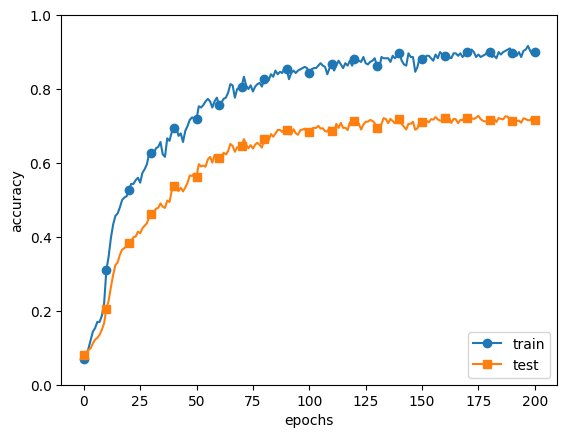

In [54]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

오버피팅을 억제했다. 훈련 데이터와 테스트 데이터 사이의 정확도 차이가 줄어들었다.

### 1) 오버피팅 억제 방법 - 드롭아웃

임의의 뉴런을 삭제하면서 학습하는 방법

훈련 때 은닉층의 뉴런을 무작위로 골라서 삭제한다.

테스트 때 훈련 때와 스케일을 맞추기 위해 훈련 때 삭제하지 않은 비율을 곱해서 출력한다

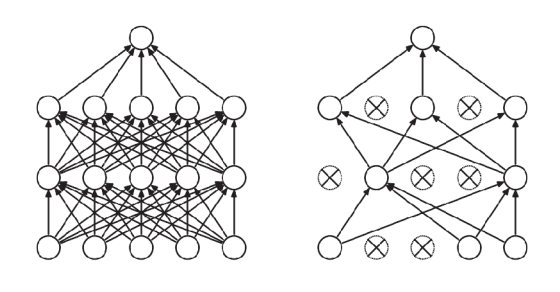

-> 특정 뉴런에 의존하지 않게 된다. 각 뉴런에 대해 골고루 영향을 받는다.

In [59]:
class Dropout:
  def __init__(self, dropout_ratio = 0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg = True): #train과 test때 dropout이 다르게 동작함.(flag로 구분함)
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.droupout_ratio
      return x * self.mask #mask를 곱해서 flg를 끄고 킨다
    else:
      return x * (1.0 - self.dropout_ratio)

  def backward(self, dout):
    return dout * self.mask

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

train loss:2.2995223191414236
=== epoch:1, train acc:0.05333333333333334, test acc:0.0617 ===
train loss:2.308063196669801
train loss:2.2909699038509284
train loss:2.2985453178951585
=== epoch:2, train acc:0.056666666666666664, test acc:0.0646 ===
train loss:2.2879149483136216
train loss:2.2929257462332306
train loss:2.2972060362244577
=== epoch:3, train acc:0.06333333333333334, test acc:0.0672 ===
train loss:2.2945983599115225
train loss:2.2840263533525818
train loss:2.2834523663341555
=== epoch:4, train acc:0.06, test acc:0.0694 ===
train loss:2.2932314080031704
train loss:2.280454971741292
train loss:2.2875374950968155
=== epoch:5, train acc:0.06666666666666667, test acc:0.0713 ===
train loss:2.276013470494749
train loss:2.2872746740358374
train loss:2.278821589400697
=== epoch:6, train acc:0.06666666666666667, test acc:0.0759 ===
train loss:2.2825473352028682
train loss:2.2860241645130923
train loss:2.3070788602119676
=== epoch:7, train acc:0.07, test acc:0.0806 ===
train loss:2.28

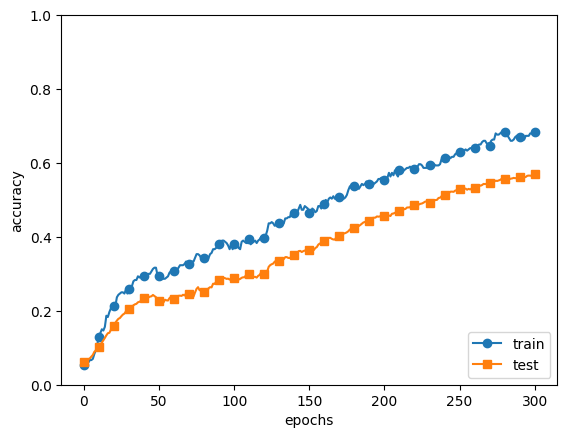

In [58]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 집합과 테스트 집합 사이 간격이 줄어들었다

### 적절한 하이퍼파라미터 값 찾기

- 하이퍼파라미터 : 각 층의 뉴런 수, 배치 크기, 학습률, 가중치감소, 드롭아웃에 사용하는 하이퍼 파라미터

하이퍼파라미터의 적절한 값을 설정해줘야 한다

- 검증 데이터 : 하이퍼파라미터를 확인하기 위한 데이터. 하이퍼파라미터의 적절성을 평가하는 데이터

테스트 데이터를 통해 훈련 데이터에 오버피팅 되었는지, 범용 성능이 어느 정도인지를 확인한다.

하이퍼파라미터의 성능을 평가할 때 테스트 데이터를 사용하면 안된다.
 -
  - 훈련 데이터 : 매개변수 학습

  - 검증 데이터 : 하이퍼파라미터의 성능 평가

  - 시험 데이터 : 신경망의 범용 성능 평가

훈련 데이터의 일부를 따로 분리해서 검증 데이터로 사용할 수 있다.

### 하이퍼파라미터 최적화

최적 값이 존재하는 범위를 조금씩 줄여나간다.

대력적인 범위를 정하고 이 범위에서 무작위로 하이퍼파라미터 값을 샘플링한다.

정확도를 평가하고 이 과정을 여러번 반복해서 하이퍼파라미터의 최적 값의 범위를 좁혀나간다

0단계: 하이퍼파라미터 값의 범위를 설정

1단계: 설정된 범위에서 하이퍼파라미터의 값을 무작위로
추출

2단계: 1단계에서 샘플링한 하이퍼파라미터 값을
사용하여 학습하고, 검증 데이터로 정확도를 평가(단,
에폭은 작게 설정)

3단계: 1단계와 2단계를 특정 횟수(100회 등) 반복하며,
그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힘

꼭 위의 방식대로 하기 보다는 어느정도 경험이나 직관에
의존하여 결정하는 경우가 많음

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

val acc:0.06 | lr:1.7048758845186929e-06, weight decay:5.0321431904162505e-06
val acc:0.11 | lr:3.3690158112165153e-06, weight decay:2.9397872135620596e-06
val acc:0.12 | lr:0.00010425783287201073, weight decay:1.7452602523823468e-07
val acc:0.11 | lr:2.287378515765476e-06, weight decay:5.812464079912883e-07
val acc:0.13 | lr:0.00023852783115283773, weight decay:4.6896123847875714e-05
val acc:0.4 | lr:0.004225525972588603, weight decay:1.6436238691703545e-06
val acc:0.1 | lr:7.873465948187164e-05, weight decay:7.300370028332764e-05
val acc:0.69 | lr:0.0055335694315669795, weight decay:4.387064056466333e-07
val acc:0.6 | lr:0.005527858654252464, weight decay:1.0208831584119178e-07
val acc:0.15 | lr:0.0005976833529194927, weight decay:1.987039968568435e-08
val acc:0.11 | lr:0.0004570881088256606, weight decay:3.6776819693976406e-06
val acc:0.07 | lr:0.00012232731400661914, weight decay:2.0361555937255948e-05
val acc:0.08 | lr:1.6518860256212557e-06, weight decay:8.711738095113166e-08
val